In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stations = pd.read_csv('../data/stations_kanto.csv')

stations.head(10)



station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0     1130506       1130506          東所沢             NaN             NaN   
1     1130507       1130507           新座             NaN             NaN   
2     1130508       1130508          北朝霞             NaN             NaN   
3     1130509       1130509          西浦和             NaN             NaN   
4     1130510       1130510         武蔵浦和             NaN             NaN   
5     1130511       1130511          南浦和             NaN             NaN   
6     1130512       1130512          東浦和             NaN             NaN   
7     1130513       1130513          東川口             NaN             NaN   
8     1130514       1130514          南越谷             NaN             NaN   
9     1130525       1130525     越谷レイクタウン             NaN             NaN   

   line_cd  pref_cd      post           address         lon  ...  \
0    11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1    11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2    11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3    11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4    11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   
5    11305       11  336-0017     さいたま市南区南浦和２丁目  139.669125  ...   
6    11305       11  336-0922         さいたま市緑区大牧  139.704627  ...   
7    11305       11  333-0811          川口市戸塚１丁目  139.744087  ...   
8    11305       11  343-0845         越谷市南越谷１丁目  139.790499  ...   
9    11305       11  343-0825         越谷市大成町５丁目  139.822178  ...   

   street_segments_count node_density_km intersection_density_km  \
0                  706.0      210.635144              200.261250   
1                  672.0      212.306961              176.365231   
2                  879.0      247.449356              220.936925   
3                  872.0      278.826632              220.477262   
4                  999.0      272.668926              246.320245   
5                 1119.0      300.098040              272.599017   
6                  816.0      250.371188              241.132398   
7                  753.0      204.376504              199.350852   
8                  756.0      207.587166              200.997097   
9                  372.0      105.371597              100.678935   

   edge_density_km  street_density_km  circuity_avg  self_loop_proportion  \
0     44092.478846       22317.256266      1.033771              0.002147   
1     36061.846385       18873.557190      1.096247              0.003834   
2     43252.257861       22209.618128      1.058486              0.001174   
3     41545.071412       21726.569992      1.042005              0.000000   
4     45257.298857       23983.223340      1.010927              0.000000   
5     52039.970076       26763.337448      1.015478              0.000458   
6     47999.863277       24374.961347      1.047661              0.001238   
7     46053.098294       23193.649554      1.021008              0.000000   
8     40172.074327       20968.856572      1.020021              0.000000   
9     25587.629027       15336.780550      1.060357              0.003091   

   clean_intersection_count  clean_intersection_density_km  station_name_roman  
0                     366.0                     165.080220                 NaN  
1                     277.0                     115.765803                 NaN  
2                     335.0                     134.570673                 NaN  
3                     301.0                     125.451145                 NaN  
4                     418.0                     166.874979                 NaN  
5                     510.0                     203.253653                 NaN  
6                     372.0                     171.841479                 NaN  
7                     421.0                     176.316615                 NaN  
8                     328.0                     135.096409                 NaN  
9         

In [3]:
X_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


In [4]:
len(stations)

2031

In [5]:
!pip install mglearn

In [6]:
from sklearn.preprocessing import StandardScaler

# データ分割
X = stations[X_columns]
X_train = X

#標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [7]:
# k-means法を使うためのインポート
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# hierarchical clusteringを利用するためのモジュールインポート
#階層的クラスタリングはscipyらしい
import mglearn
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import dendrogram, ward


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
#ward法で分類
linkage_array = ward(X_std)
 
ax = plt.figure(figsize=(20,10)).gca()
dendrogram(linkage_array)
bounds = ax.get_xbound()
 
plt.xlabel("sample index",fontsize=10)
plt.ylabel("Cluster distance",fontsize=10)

NameError: name 'ward' is not defined

In [9]:
from scipy.cluster.hierarchy import linkage, fcluster
 
# クラスタ分けするしきい値を決める。4分割したいので60に設定。
threshold = 60
linkage_array = linkage(X_std, method='ward', metric='euclidean')
 
# クラスタリング結果の値を取得
clustered = fcluster(linkage_array, threshold, criterion='distance')

In [10]:
print(linkage_array)

[[1.44000000e+02 2.13000000e+02 0.00000000e+00 2.00000000e+00]
 [3.17000000e+02 4.17000000e+02 0.00000000e+00 2.00000000e+00]
 [6.32000000e+02 2.03200000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [4.05300000e+03 4.05500000e+03 6.81010376e+01 1.03600000e+03]
 [4.05200000e+03 4.05700000e+03 1.01904987e+02 9.95000000e+02]
 [4.05800000e+03 4.05900000e+03 1.73339181e+02 2.03100000e+03]]


In [11]:
X_std

array([[-0.36257818, -0.07645098,  1.73740291, ...,  0.49182554,
         0.30156106,  0.49511112],
       [-0.21775457, -0.20661052,  0.09752263, ...,  1.14512039,
        -0.32518374, -0.45746915],
       [ 0.16373203,  0.35181591,  0.86117245, ...,  0.1149824 ,
         0.08325669, -0.09422552],
       ...,
       [-1.64126472, -1.62856855,  0.77713888, ..., -0.3398339 ,
        -1.69838864, -1.79560717],
       [-1.6659907 , -1.65655985,  0.74560389, ...,  2.5502861 ,
        -1.71951487, -1.78378314],
       [-1.7083781 , -1.69574767,  0.96194857, ...,  2.88746676,
        -1.77585148, -1.84524719]])

In [12]:
pd.DataFrame(clustered).describe()

0
count  2031.000000
mean      2.354998
std       1.083928
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000

3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

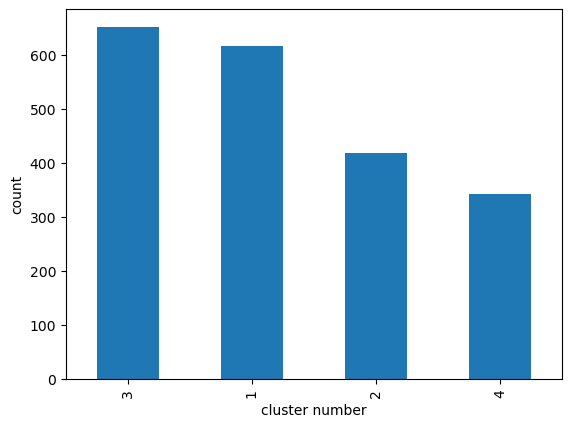

In [13]:
# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(clustered, name='cluster_number', index=stations.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [14]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([stations, pd.Series(labels, index=stations.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0     1130506       1130506          東所沢             NaN             NaN   
1     1130507       1130507           新座             NaN             NaN   
2     1130508       1130508          北朝霞             NaN             NaN   
3     1130509       1130509          西浦和             NaN             NaN   
4     1130510       1130510         武蔵浦和             NaN             NaN   

   line_cd  pref_cd      post           address         lon  ...  \
0    11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1    11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2    11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3    11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4    11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   

   node_density_km intersection_density_km edge_density_km  street_density_km  \
0       210.635144              200.261250    44092.478846       22317.256266   
1       212.306961              176.365231    36061.846385       18873.557190   
2       247.449356              220.936925    43252.257861       22209.618128   
3       278.826632              220.477262    41545.071412       21726.569992   
4       272.668926              246.320245    45257.298857       23983.223340   

   circuity_avg  self_loop_proportion  clean_intersection_count  \
0      1.033771              0.002147                     366.0   
1      1.096247              0.003834                     277.0   
2      1.058486              0.001174                     335.0   
3      1.042005              0.000000                     301.0   
4      1.010927              0.000000                     418.0   

   clean_intersection_density_km  station_name_roman  cluster_number  
0                     165.080220                 NaN               3  
1                     115.765803                 NaN               3  
2                     134.570673                 NaN               1  
3                     125.451145                 NaN               1  
4                     166.874979                 NaN               1  

[5 rows x 37 columns]

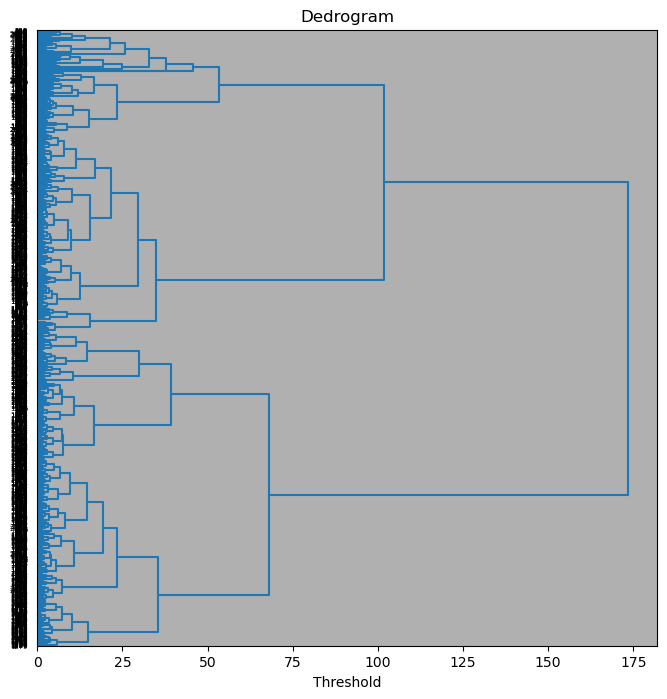

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(8, 8))
dendrogram(linkage_array, orientation='right', labels=list(stations.index), color_threshold=0.01)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

In [16]:
labels.value_counts()

3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


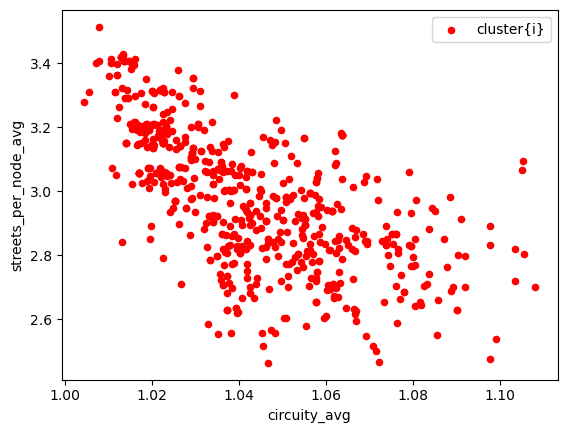

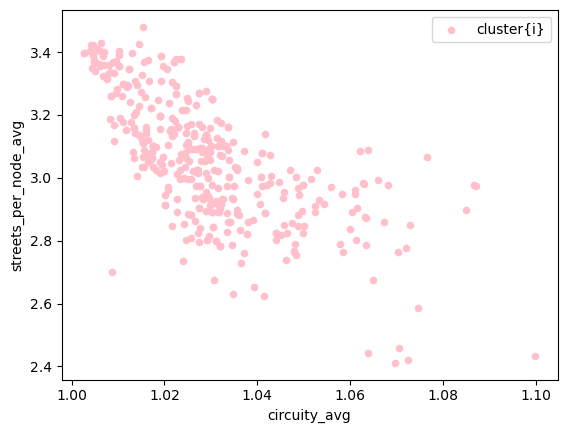

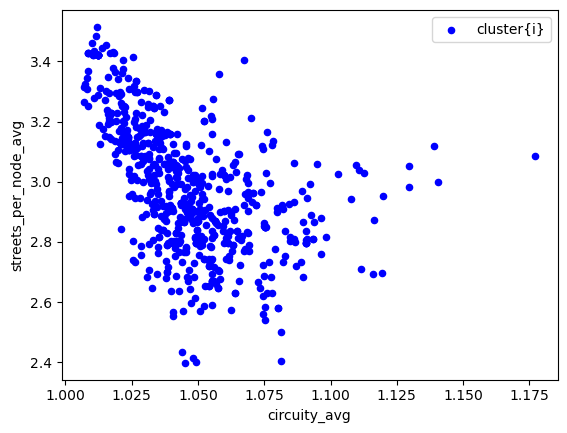

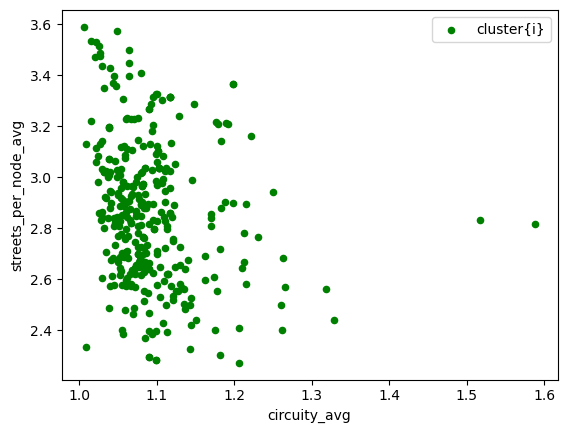

In [17]:
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
stations_3 = stations_with_cluster[stations_with_cluster['cluster_number'] == 3]
stations_4 = stations_with_cluster[stations_with_cluster['cluster_number'] == 4]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue', 'green']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='circuity_avg', y='streets_per_node_avg', color=colors[i - 1], label='cluster{i}', ax=ax)

In [18]:
import folium
center_lat, center_lon = (35.651820534474,139.54461236426)

_map = folium.Map(location=[center_lat, center_lon], zoom_start=11)

for _, station in stations_with_cluster.iterrows():
    color = 'pink' if station['cluster_number'] == 1 else 'blue' if station['cluster_number'] == 2 else 'red' if station['cluster_number'] == 3 else 'green' if station['cluster_number'] == 4 else 'orange'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [19]:
stations_with_cluster.to_csv('./stations_with_hierarchical_cluster_4_without_pca.csv', index=False)

In [20]:
stations_with_cluster.head()

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0     1130506       1130506          東所沢             NaN             NaN   
1     1130507       1130507           新座             NaN             NaN   
2     1130508       1130508          北朝霞             NaN             NaN   
3     1130509       1130509          西浦和             NaN             NaN   
4     1130510       1130510         武蔵浦和             NaN             NaN   

   line_cd  pref_cd      post           address         lon  ...  \
0    11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1    11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2    11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3    11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4    11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   

   node_density_km intersection_density_km edge_density_km  street_density_km  \
0       210.635144              200.261250    44092.478846       22317.256266   
1       212.306961              176.365231    36061.846385       18873.557190   
2       247.449356              220.936925    43252.257861       22209.618128   
3       278.826632              220.477262    41545.071412       21726.569992   
4       272.668926              246.320245    45257.298857       23983.223340   

   circuity_avg  self_loop_proportion  clean_intersection_count  \
0      1.033771              0.002147                     366.0   
1      1.096247              0.003834                     277.0   
2      1.058486              0.001174                     335.0   
3      1.042005              0.000000                     301.0   
4      1.010927              0.000000                     418.0   

   clean_intersection_density_km  station_name_roman  cluster_number  
0                     165.080220                 NaN               3  
1                     115.765803                 NaN               3  
2                     134.570673                 NaN               1  
3                     125.451145                 NaN               1  
4                     166.874979                 NaN               1  

[5 rows x 37 columns]

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold を変えるとクラスタ数や平均クラスタサイズがどう変わるか調べる
def draw_threshold_dependency(result):
    n_clusters = len(result)
    n_samples = len(result)
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        x1.append(val)
        x2.append(val)
        y1.append(n_clusters)
        y2.append(float(n_samples) / float(n_clusters))

    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'yo-')
    plt.title('Threshold dependency of hierarchical clustering')
    plt.ylabel('Num of clusters')
    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'ro-')
    plt.xlabel('Threshold')
    plt.ylabel('Ave cluster size')
    plt.show()

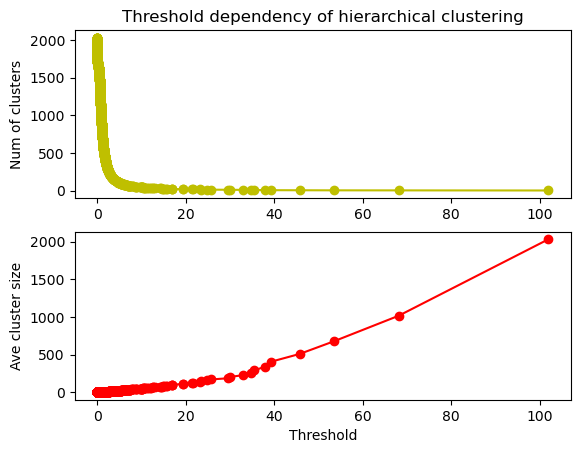

In [22]:
draw_threshold_dependency(linkage_array)

In [23]:
# 指定した thoreshold でクラスタを得る関数を作る
def get_cluster_by_threshold(result, threshold):
    output_clusters = []
    output_cluster_ids = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        if val < threshold:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [24]:
# 指定した thoreshold でクラスタを得る関数を使う。
clusterIDs = get_cluster_by_threshold(linkage_array, 0.005)
print(clusterIDs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 30, 47, 48, 49, 50, 30, 47, 51, 48, 49, 50, 52, 53, 54, 55, 16, 28, 29, 30, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 30, 30, 29, 71, 72, 28, 5, 73, 74, 75, 30, 28, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 20, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 36, 119, 120, 121, 122, 123, 117, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 114, 139, 140, 90, 141, 142, 143, 144, 145, 146, 18, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 15, 157, 158, 159, 160, 156, 15, 157, 158, 159, 160, 161, 162, 163, 164, 165, 148, 166, 167, 168, 167, 147, 169, 170, 171, 172, 173, 174, 175, 76, 76, 123, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 18

In [25]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [26]:
clusterIDs = get_cluster_by_number(linkage_array, 4)
print(clusterIDs)

[0, 0, 1, 1, 1, 2, 1, 0, 0, 3, 0, 3, 3, 0, 0, 2, 1, 1, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 3, 1, 3, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 3, 1, 1, 0, 0, 1, 1, 2, 2, 1, 3, 0, 0, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 

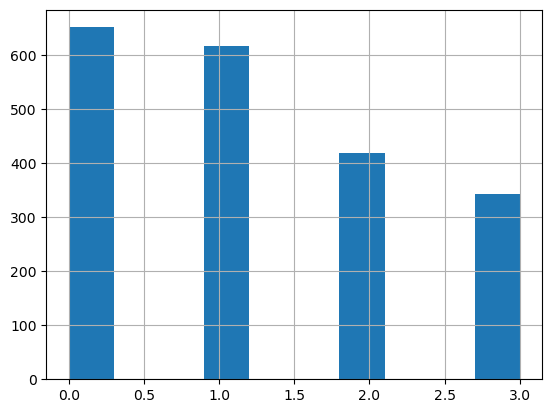

In [27]:
plt.hist(clusterIDs)
plt.grid()

In [28]:
import math
def silhouette_coefficient(clusters, df):
    a_same = []
    b_diff = []
    for i, j in enumerate(clusters):
        vec1 = df.iloc[i, :].values
        for k, l in enumerate(clusters):
            if i < k:
                vec2 = df.iloc[k, :].values
                dist = 0.
                for v1, v2 in zip(vec1, vec2):
                    dist += (v1 - v2) ** 2
                dist = math.sqrt(dist)
                if j == l: # same cluster
                    a_same.append(dist)
                else: # different cluster
                    b_diff.append(dist)
    a = sum(a_same) / len(a_same)
    b = sum(b_diff) / len(b_diff)
    return (b - a) / max(b, a)

In [29]:
silhouette_coefficient(clusterIDs, X)

0.6280487568354598

In [ ]:
x = []
y = []
for i in range(2, len(X)):
    x.append(i)
    y.append(silhouette_coefficient(get_cluster_by_number(linkage_array, i), X))
plt.plot(x, y)
plt.xlabel("Num of clusters")
plt.ylabel("silhouette coefficient")
plt.grid()
plt.show()

In [30]:
import math
def get_distance_matrix(df):
    distance_matrix = []
    for i in range(len(df)):
        vec1 = df.iloc[i, :].values
        distance_array = []
        for j in range(len(df)):
            vec2 = df.iloc[j, :].values
            dist = 0.
            for v1, v2 in zip(vec1, vec2):
                dist += (v1 - v2) ** 2
            distance_array.append(math.sqrt(dist))
        distance_matrix.append(distance_array)
    return distance_matrix

In [31]:
def silhouette_coefficient2(clusters, distance_matrix):
    a_same = []
    b_diff = []
    for i, j in enumerate(clusters):
        for k, l in enumerate(clusters):
            if i < k:
                dist = distance_matrix[i][k]
                if j == l: # same cluster
                    a_same.append(dist)
                else: # different cluster
                    b_diff.append(dist)
    a = sum(a_same) / len(a_same)
    b = sum(b_diff) / len(b_diff)
    return (b - a) / max(b, a)

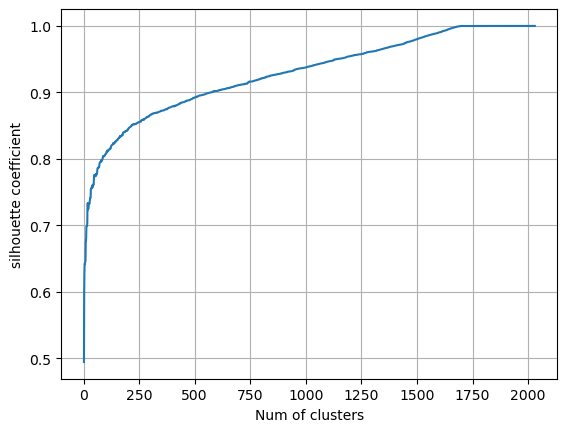

In [59]:
distance_matrix = get_distance_matrix(X)
x = []
y = []
for i in range(2, len(X)):
    x.append(i)
    y.append(silhouette_coefficient2(get_cluster_by_number(linkage_array, i), distance_matrix))
plt.plot(x, y)
plt.xlabel("Num of clusters")
plt.ylabel("silhouette coefficient")
plt.grid()
plt.show()

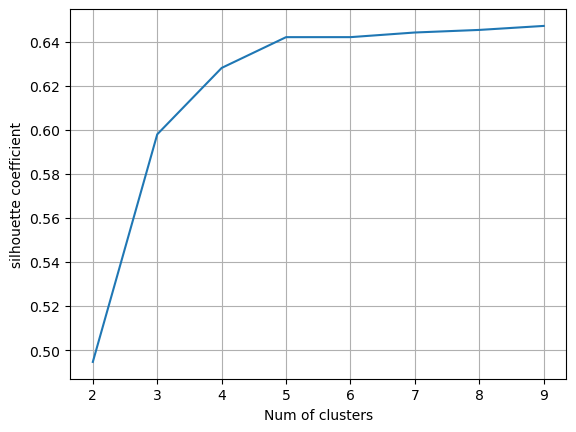

In [67]:
distance_matrix = get_distance_matrix(X)
x = []
y = []
for i in range(2, 10):
    x.append(i)
    y.append(silhouette_coefficient2(get_cluster_by_number(linkage_array, i), distance_matrix))
plt.plot(x, y)
plt.xlabel("Num of clusters")
plt.ylabel("silhouette coefficient")
plt.grid()
plt.show()

In [32]:
clusterIDs = get_cluster_by_number(linkage_array, 5)

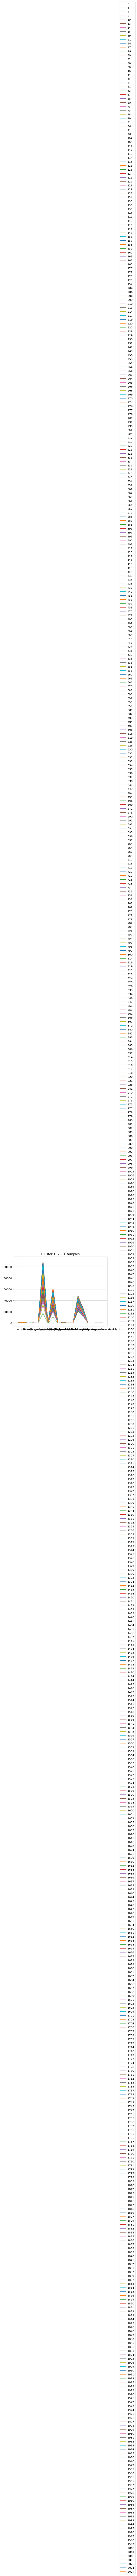

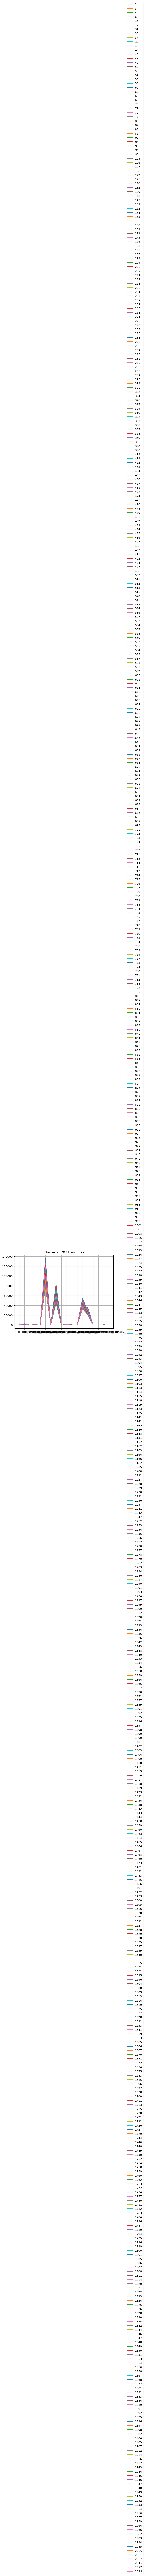

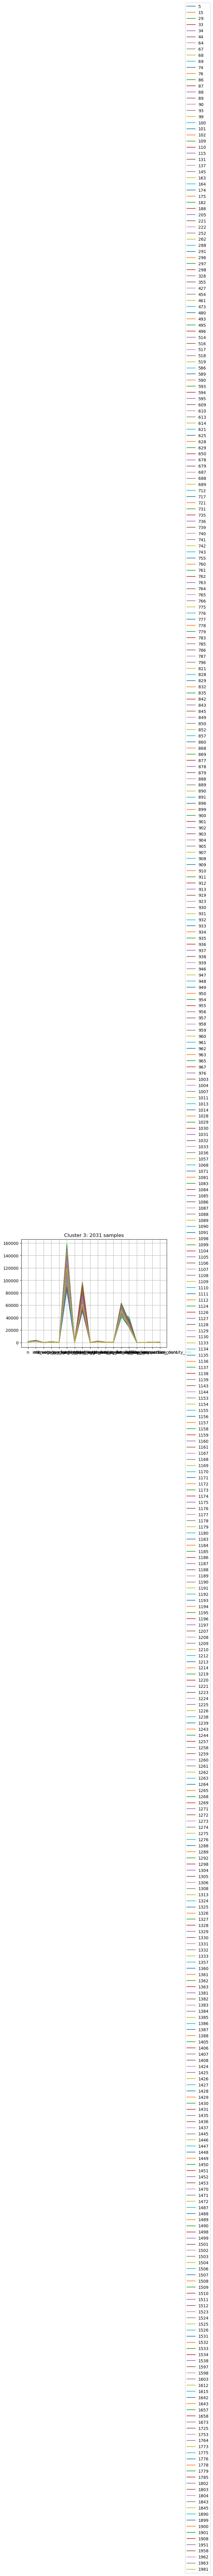

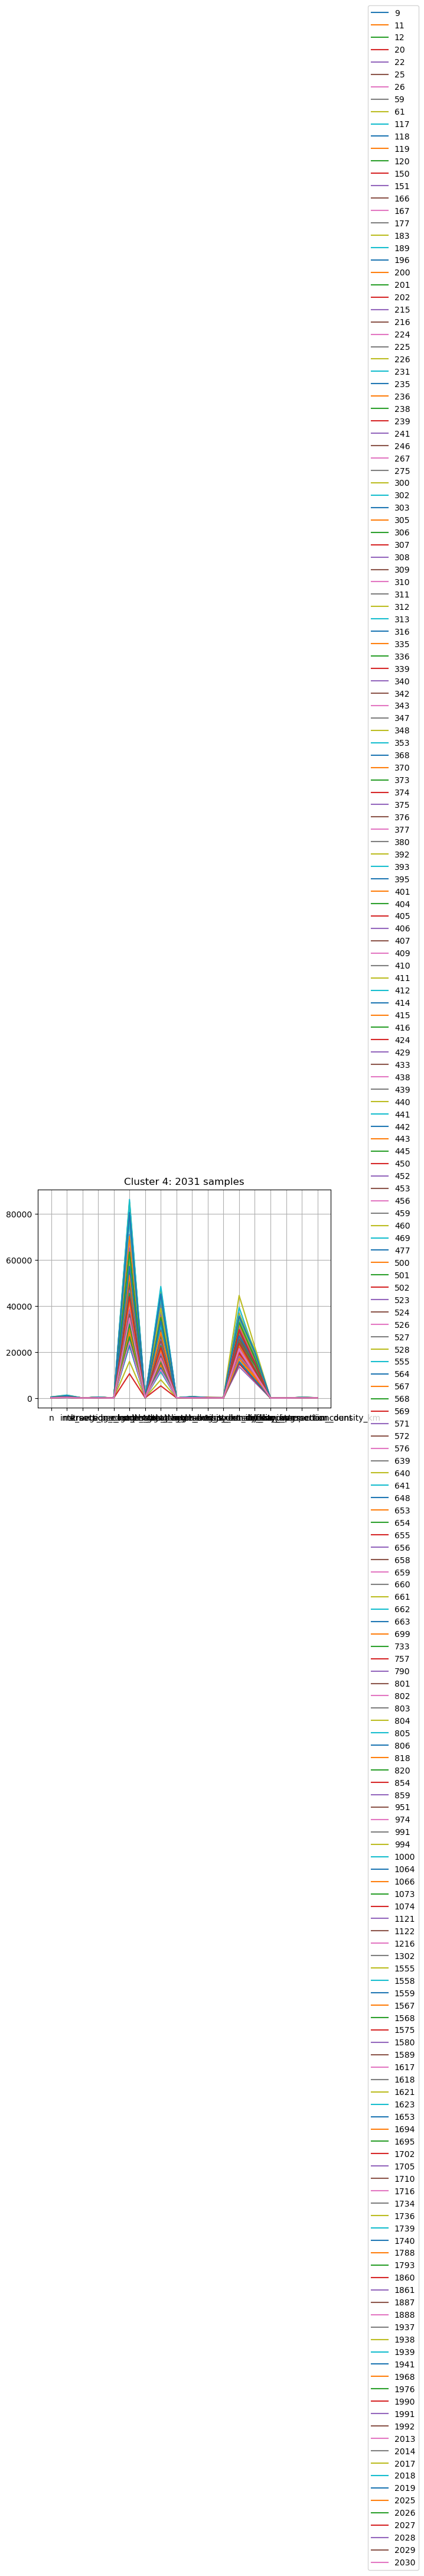

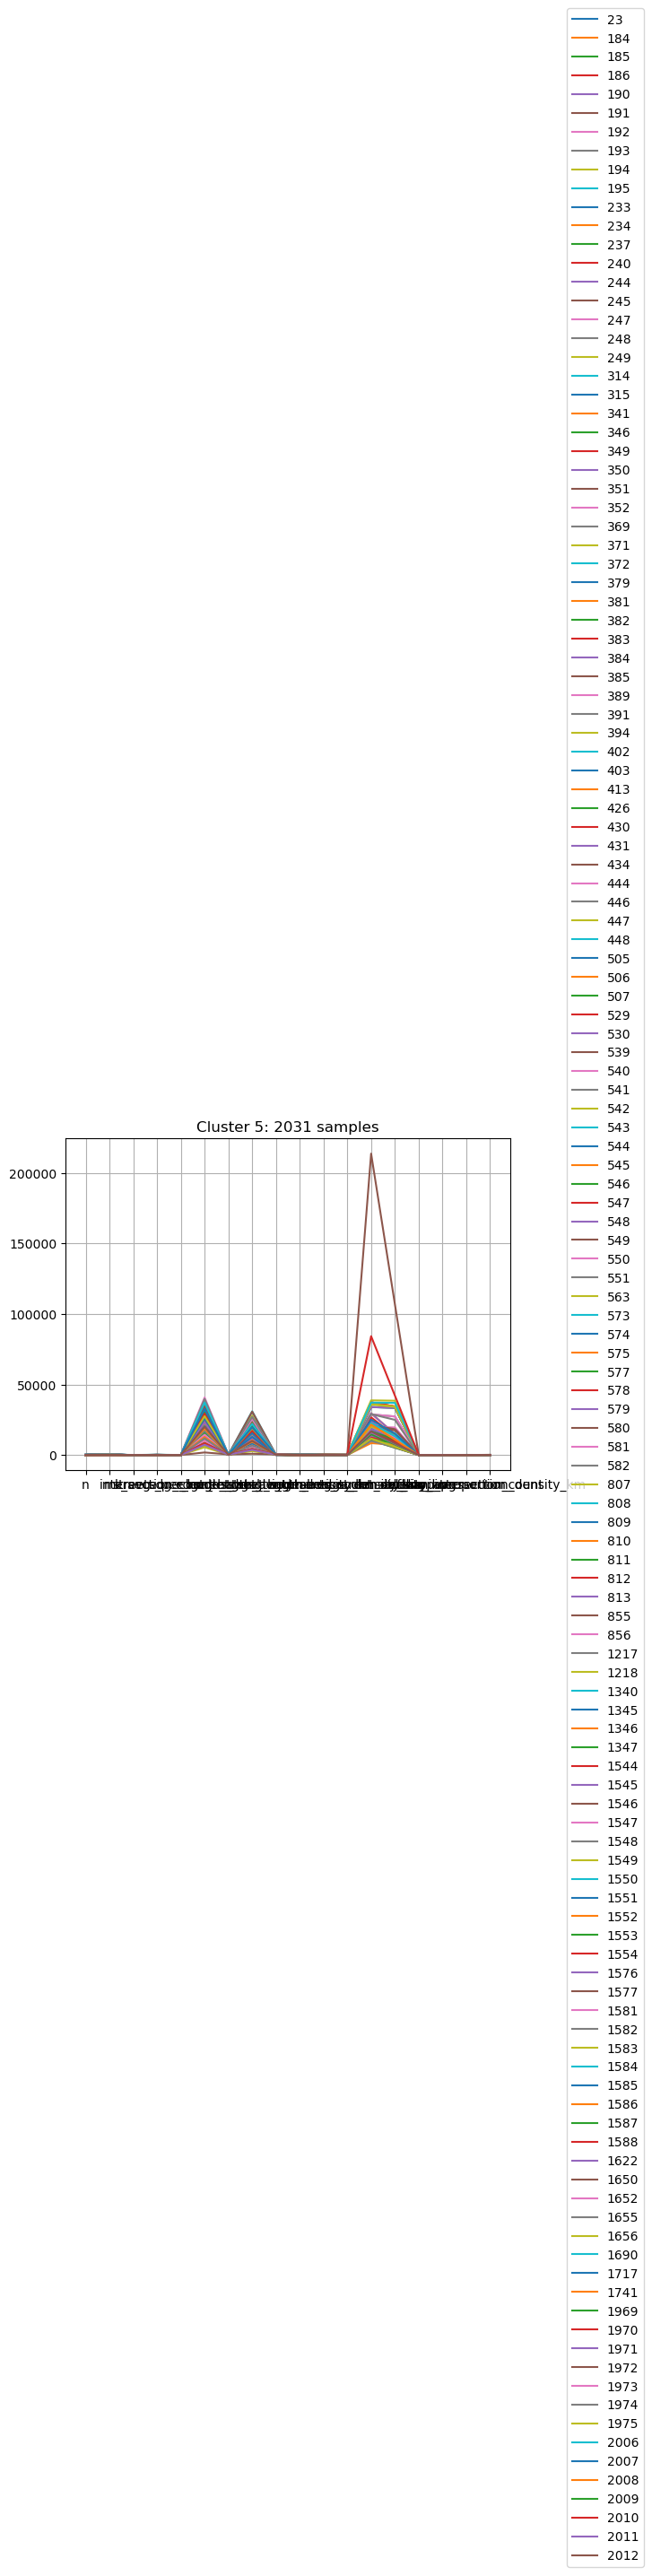

In [33]:
for i in range(max(clusterIDs) + 1):
    cluster = []
    for j, k in enumerate(clusterIDs):
        if i == k:
            cluster.append(j)
    plt.title("Cluster {}: {} samples".format(i + 1, len(clustered)))
    for j in cluster:
        plt.plot(X.iloc[j, :], label=X.index[j])
    plt.legend( loc = 'center right',
          bbox_to_anchor = (0.8, 0.5, 0.5, 0.1),
          borderaxespad = 0.0)
    plt.grid()
    plt.show()

In [34]:
from matplotlib import pyplot as plt
import numpy as np

def calc_silhouette(data, clusters):
    """
    クラスタリングのシルエット係数の計算
    
    Parameters
    ----------
    data :
        データサンプル
    clusters :
        各データサンプルが属するクラスタ
    """
    n = len(data)
    num_clusters = len(np.unique(clusters))
    cl_ids = []
    centroids = []
    for c in range(num_clusters):
        ids = np.where(clusters == c)[0]
        cl_ids.append(ids)
        centroids.append(np.average(data[ids], axis=0))
    silhouette = np.zeros(n)
    for c in range(num_clusters):
        for i in cl_ids[c]:
            nearest_clusters = np.argsort(np.sum((data[i]-centroids)**2, axis=1))
            c_nearest = nearest_clusters[1] if nearest_clusters[0]==c else nearest_clusters[0]
            a = np.sum(np.sqrt(np.sum((data[i]-data[cl_ids[c]])**2, axis=1))) / (len(cl_ids[c])-1)
            b = np.average(np.sqrt(np.sum((data[i]-data[cl_ids[c_nearest]])**2, axis=1)))
            silhouette[i] = (b-a) / max(a, b)
    return silhouette


def plot_silhouette(data, clusters):
    """
    シルエット係数を計算・描画
    """
    cl_size = {}
    for c in np.unique(clusters):
        cl_size[c] = np.count_nonzero(clusters == c)
    silhouette = calc_silhouette(data, clusters)
    silhouette_ave = np.average(silhouette)
    ids_sorted = np.lexsort((silhouette, clusters))
    data_sorted = data[ids_sorted]
    silhouette_sorted = silhouette[ids_sorted]
    
    plt.figure(figsize=(12, 4))
    # クラスタの描画
    plt.subplot(1, 2, 1)
    plt.title('Clusters')
    start = 0
    for c in range(len(cl_size)):
        plt.scatter(data_sorted[start:start+cl_size[c], 0], data_sorted[start:start+cl_size[c], 1], s=20, label='Cluster {}'.format(c+1))
        start += cl_size[c]
    plt.legend(loc='upper left')
    # シルエット図の描画
    plt.subplot(1, 2, 2)
    plt.title('Silhouette')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Number of Data')
    plt.axvline(silhouette_ave, c='black', linestyle='dashed', label='average = {:.3f}'.format(silhouette_ave))
    start = 0
    for c in range(len(cl_size)):
        plt.barh(range(start, start+cl_size[c]), silhouette_sorted[start:start+cl_size[c]], height=1.0, label='Cluster {}'.format(c+1))
        start += cl_size[c]
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = pd.Series(clustered, name='cluster_number', index=stations.index)
#cluster_labels = np.unique(z_km.labels_)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, cluster_labels)


y_ax_lower,y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[cluster_labels==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height = 1.0,
           edgecolor = "none",
           color = color)
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = "red",linestyle = "--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficient")
plt.yticks(yticks,cluster_labels + 1)

652
652
617
617
617
419
617
652
652
343
652
343
343
652
652
419
617
617
652
652
343
652
343
343
652
343
343
652
652
419
652
617
652
419
419
617
652
617
652
617
652
652
652
617
419
617
617
652
617
617
617
652
652
617
617
617
617
652
652
343
617
343
617
617
419
652
617
419
419
419
617
617
617
652
419
652
419
617
652
652
617
652
617
617
652
617
419
419
419
419
419
652
617
419
617
617
617
617
652
419
419
419
419
617
652
652
617
617
617
419
419
652
652
652
652
419
652
343
343
343
343
652
617
652
652
617
652
652
652
652
617
419
617
652
652
652
652
419
652
617
617
652
652
652
652
419
652
617
652
617
343
343
617
652
617
617
617
652
652
652
652
652
652
419
419
652
343
343
617
617
652
652
617
617
419
419
617
343
652
652
617
617
419
343
343
343
343
617
419
343
343
343
343
343
343
343
343
652
617
617
343
343
343
617
652
419
652
617
652
652
652
617
617
652
652
343
343
652
617
652
652
419
419
617
343
343
343
652
652
652
652
343
652
343
343
343
343
343
343
343
343
343
652
652
343
343
343
343
343
343


In [1]:
cluster_labels

NameError: name 'cluster_labels' is not defined